<a href="https://colab.research.google.com/github/IlliaKindratenko/Machine-learning/blob/main/%D0%9B_%D0%A0_8_1_%D0%9A%D1%96%D0%BD%D0%B4%D1%80%D0%B0%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_%D0%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №8
Кіндратенко Ілля ФІТ 4-7
## Розробка нейронної мережі з використанням бібліотеки KERAS
## Завдання 1
Побудувати звичайну багатошарову нейронну мережу для датасету fashion
mnist
1. Завантажити датасет
2. Роздрукувати 10 зображень.
3. Підготовувати дані, побудувати архітектуру.
4. Використати ранню зупинку і зменшення швидкості для запобіганню
перенавчанню.
5. Вивести архітектуру моделі.
6. Зберегти модель на гугл диск.
7. Побудувати графіки функції втрат і точності для тренувальних і
тестових даних
8. Вивести класифікаційний звіт.
9. Результати розпізнавання із прогнозованим і справжнім класом


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Задати імена класів
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

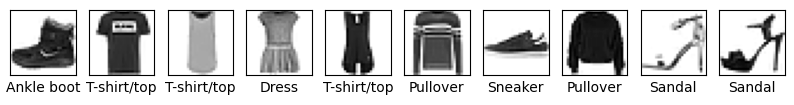

In [4]:
# Роздрукувати 10 зображень.
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
# Підготовувати дані, побудувати архітектуру
train_images = train_images / 255.0
test_images = test_images / 255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Вивести архітектуру моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Використати ранню зупинку і зменшення швидкості для запобіганню перенавчанню
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.7808 - loss: 0.6129 - val_accuracy: 0.8576 - val_loss: 0.3929 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - accuracy: 0.8628 - loss: 0.3729 - val_accuracy: 0.8643 - val_loss: 0.3716 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 13ms/step - accuracy: 0.8769 - loss: 0.3328 - val_accuracy: 0.8649 - val_loss: 0.3671 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 18ms/step - accuracy: 0.8882 - loss: 0.3014 - val_accuracy: 0.8677 - val_loss: 0.3891 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8957 - loss: 0.2828 - val_accuracy: 0.8745 - val_loss: 0.3526 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8992 - loss: 0.2715 - val_accuracy: 0.8792 - val_loss: 0.3405 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accurac

In [8]:
# Зберегти модель на гугл диск
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/Files/model.keras')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


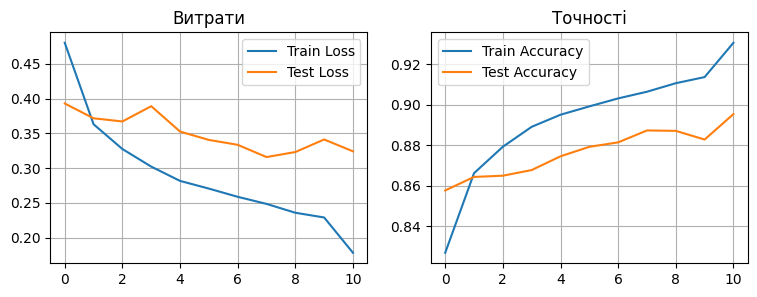

In [9]:
# Побудувати графіки функції втрат і точності для тренувальних і тестових даних
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Витрати')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Точності')
plt.grid(True)
plt.legend()

plt.show()

In [10]:
# Вивести класифікаційний звіт
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)

predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(test_labels, predicted_labels, target_names=class_names))

313/313 - 1s - 4ms/step - accuracy: 0.8873 - loss: 0.3159
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.83      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.76      0.85      0.81      1000
       Dress       0.89      0.90      0.89      1000
        Coat       0.81      0.79      0.80      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.74      0.68      0.71      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



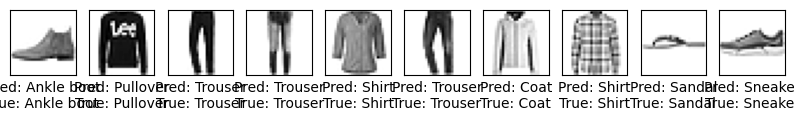

In [11]:
# Результати розпізнавання із прогнозованим і справжнім класом
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[test_labels[i]]}")
plt.show()

Висновок: У цій роботі була створена багатошарова нейронна мережа для класифікації зображень із датасету Fashion MNIST. Мережа має чотири повнозв'язні шари з функцією активації ReLU, і останній шар використовує softmax для багатокласової класифікації. Для покращення продуктивності та запобігання перенавчанню використані методи ранньої зупинки та зменшення швидкості навчання. Після навчання модель досягла точності 88.7% на тестових даних. Побудовані графіки втрат та точності демонструють стабільне навчання моделі, а класифікаційний звіт показує хороші результати для різних класів.